# Homework questions

Perform PCA on these data to find the optimal principal components, considering the
following variables: wave height, dominant wave period, average wave period, the
direction from which the waves at the dominant period are coming, and sea surface
temperature. Then, cluster in that PC space to find clusters in the reduced
dimensional space.

Plot PC1 vs PC2.
   
Perform K-means on the principal component transformed data and plot the
Sum of squared distances as a function of the number of clusters for 1 to 10
clusters.

How many clusters are the right choice, why?

- 2 clusters, because the elbow of the plot takes place at k=2. 
   
Plot PC1 vs PC2, add the points of the cluster centers.
   
Does this clustering make sense with what you can see with your eyes?

- Yeah I'd say so. I don't think using more than 2 clusters would make sense / be necessary with how the data is spread out on the plot

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

# Reading in data

In [2]:
buoy = pd.read_csv('/Users/katherinemottola/Desktop/important/school/GEOL599/3_06_24/buoy.txt', delim_whitespace = True)

# Getting rid of unnecessary/ renaming columns

In [3]:
cols = ['WVHT','DPD','APD','MWD','WTMP']

buoy = buoy[cols]


# Renaming
buoy.columns = ['Wave Height','Dominant Wave Period','Average Wave Period','Dom Direction','SST']

# Note: using 5 variables so max pcas is 5

In [4]:
buoy

,Wave Height,Dominant Wave Period,Average Wave Period,Dom Direction,SST
0,1.12,12.50,7.69,269,15.3
1,1.16,11.76,7.34,272,15.3
2,1.20,12.50,7.08,268,15.3
3,1.25,10.53,7.33,268,15.4
4,1.27,10.53,7.57,268,15.5
...,...,...,...,...,...
17280,2.01,14.29,11.19,270,16.7
17281,1.75,15.38,10.37,267,16.7
17282,1.79,13.33,10.50,268,16.8
17283,1.66,14.29,10.32,271,16.8


# Get rid of the random super high numbers they put in here?

In [5]:
check99 = ['Wave Height','Dominant Wave Period','Average Wave Period','SST']

buoy = buoy[(buoy['Wave Height'] <= 66)]
buoy = buoy[(buoy['Dominant Wave Period'] <= 66)]
buoy = buoy[(buoy['Average Wave Period'] <= 66)]
buoy = buoy[(buoy['SST'] <= 66)]

#then check direction for 999 bc 3 dig
buoy = buoy[buoy['Dom Direction']<=666]

# Perform PCA

In [6]:
features = ['Wave Height','Dominant Wave Period','Average Wave Period','Dom Direction','SST']

In [7]:
# Change into an array so I can work w it

X = buoy[['Wave Height','Dominant Wave Period','Average Wave Period','Dom Direction', 'SST']].copy()
X = X.to_numpy()
X

array([[  1.12,  12.5 ,   7.69, 269.  ,  15.3 ],
       [  1.16,  11.76,   7.34, 272.  ,  15.3 ],
       [  1.2 ,  12.5 ,   7.08, 268.  ,  15.3 ],
       ...,
       [  1.79,  13.33,  10.5 , 268.  ,  16.8 ],
       [  1.66,  14.29,  10.32, 271.  ,  16.8 ],
       [  1.7 ,  12.5 ,  10.54, 271.  ,  16.9 ]])

In [8]:
# since I know from last week 2-3 principle components covers most of the data ill just do that 
# the variance ratio also seems to be the same b/w them so again i dont think it matters if i do 2 or 3?

pca3 = PCA(n_components=3)
pca3.fit(X)
print(pca3.explained_variance_ratio_)

[0.99077752 0.00567156 0.00248888]


In [9]:
pca2 = PCA(n_components=2)
pca2.fit(X)
print(pca2.explained_variance_ratio_)

[0.99077752 0.00567156]


# Fix shape of PCA data array 

In [10]:
plotData3 = pca3.transform(X)

In [11]:
pc1 = plotData3[:, 0]
pc2 = plotData3[:, 1]

# Plot pc1 vs pc2

Text(0, 0.5, 'PC2')

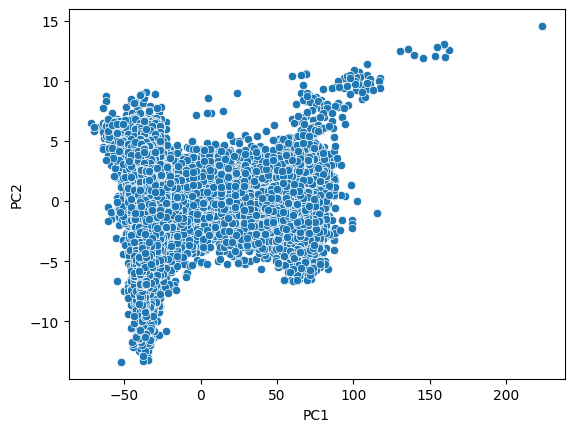

In [12]:
sns.scatterplot(x=pc1, y=pc2)

plt.xlabel('PC1')
plt.ylabel('PC2')

# Perform KMeans

In [13]:
kmeans1 = KMeans(n_clusters = 1, n_init='auto').fit(X)
kmeans2 = KMeans(n_clusters = 2, n_init='auto').fit(X)
kmeans3 = KMeans(n_clusters = 3, n_init='auto').fit(X)
kmeans4 = KMeans(n_clusters = 4, n_init='auto').fit(X)
kmeans5 = KMeans(n_clusters = 5, n_init='auto').fit(X)
kmeans6 = KMeans(n_clusters = 6, n_init='auto').fit(X)
kmeans7 = KMeans(n_clusters = 7, n_init='auto').fit(X)
kmeans8 = KMeans(n_clusters = 8, n_init='auto').fit(X)
kmeans9 = KMeans(n_clusters = 9, n_init='auto').fit(X)
kmeans10 = KMeans(n_clusters = 10, n_init='auto').fit(X)

In [29]:
# from the website:
# Compute cluster centers and predict cluster index for each sample
# "kmeans.fit_predict method returns the array of cluster labels each data point belongs to."

In [15]:
# I guess from what documentation says inertia is how it gives u sum of sq diff?

sum1 = kmeans1.inertia_
sum2 = kmeans2.inertia_
sum3 = kmeans3.inertia_
sum4 = kmeans4.inertia_
sum5 = kmeans5.inertia_
sum6 = kmeans6.inertia_
sum7 = kmeans7.inertia_
sum8 = kmeans8.inertia_
sum9 = kmeans9.inertia_
sum10 = kmeans10.inertia_

In [16]:
bla = {
    'num clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'sq dist':[sum1, sum2, sum3, sum4, sum5, sum6, sum7, sum8, sum9, sum10]}

In [17]:
df = pd.DataFrame(bla)

In [18]:
df

,num clusters,sq dist
0,1,3.737803e+07
1,2,3.547330e+06
2,3,1.998433e+06
3,4,1.470726e+06
4,5,1.187773e+06
5,6,9.839915e+05
6,7,8.364311e+05
7,8,7.686094e+05
8,9,6.694542e+05
9,10,5.800396e+05


# Number of K Means Clusters vs Sum of Squared Distances / Elbow Plot

Text(0.5, 1.0, 'Elbow Plot: Number of K Means Clusters vs Sum of Squared Distances')

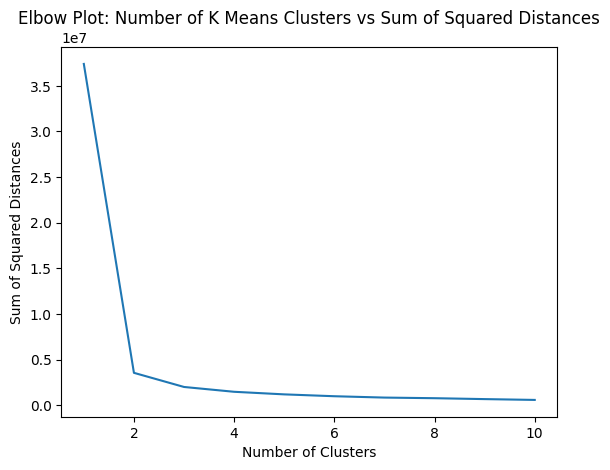

In [19]:
fig, ax = plt.subplots()

plt.plot(df['num clusters'], df['sq dist'])

plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot: Number of K Means Clusters vs Sum of Squared Distances')

# Find centers

In [21]:
# have to fit first or it wont work

kmeans2.fit(plotData3)

KMeans(n_clusters=2)

In [22]:
centers = kmeans2.cluster_centers_

In [23]:
centers.shape

(2, 3)

# Plot with centers

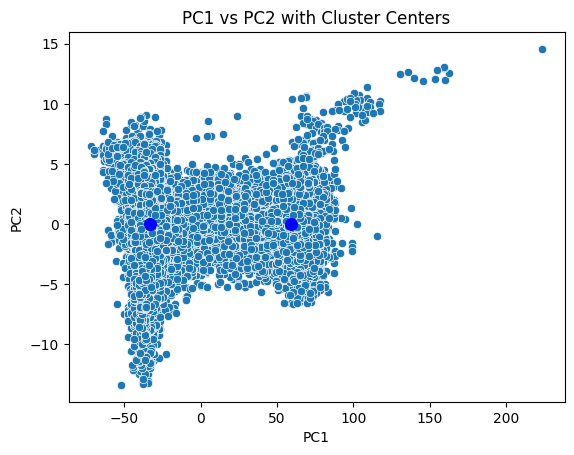

In [28]:
fig, ax = plt.subplots()

sns.scatterplot(x=pc1, y=pc2)
plt.scatter(centers[:,0], centers[:,1], c='blue', marker = 'o', s=70)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 with Cluster Centers')
plt.show()